In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud

In [7]:
df = pd.read_csv('data/spam.csv', encoding='ISO-8859-1')
df = df.drop(["Unnamed: 2","Unnamed: 3", "Unnamed: 4"], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#rename columns
df.columns = ['labels', 'data']

In [11]:
#create binary labels
df['b_labels'] = df['labels'].map({'ham':0, 'spam': 1})
Y = df['b_labels']

In [15]:
# calculate features
count_vectorizer = CountVectorizer(decode_error='ignore')
X = count_vectorizer.fit_transform(df['data'])

In [16]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.33)

In [17]:
#create model and train it
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("Train accuracy: ", model.score(Xtrain, Ytrain))
print("Test accuracy: ", model.score(Xtest, Ytest))

Train accuracy:  0.993838735601393
Test accuracy:  0.9836867862969005


In [18]:
# visualize data
def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width = 600, height = 400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

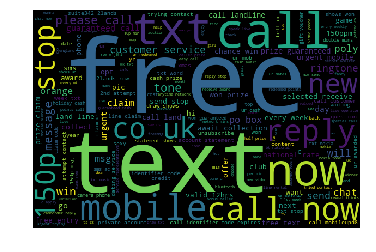

In [19]:
visualize('spam')

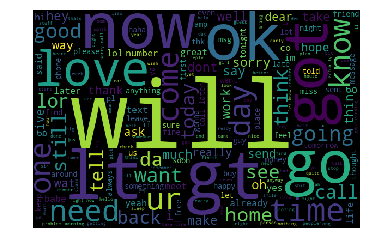

In [20]:
visualize('ham')

In [26]:
df['predictions'] = model.predict(X)

# things that should be spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
Hi ya babe x u 4goten bout me?' scammers getting smart..Though this is a regular vodafone no, if you respond you get further prem rate msg/subscription. Other nos used also. Beware!
Babe: U want me dont u baby! Im nasty and have a thing 4 filthyguys. Fancy a rude time with a sexy bitch. How about we go slo n hard! Txt XXX SLO(4msgs)
This message is brought to you by GMW Ltd. and is not connected to the
Hello darling how are you today? I would 

In [27]:
# the things that shouldn't be a spam
should_not_be_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in should_not_be_spam:
    print(msg)

As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
Waiting for your call.
Nutter. Cutter. Ctter. Cttergg. Cttargg. Ctargg. Ctagg. ie you
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Ambrith..madurai..met u in arun dha marrge..remembr?
Ultimately tor motive tui achieve korli.
Tick, tick, tick ... Babe
Mostly sports type..lyk footbl,crckt..
Boy; I love u Grl: Hogolo Boy: gold chain kodstini Grl: Agalla Boy: necklace madstini Grl: agalla Boy: 